<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Trabalho_3_de_Cosmologia_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercício da aula de 20/10/2022.

1) Plotar a função $\frac{x_e ^2}{1-x_e}$ = A $a^{3/2}$ $e^{-\alpha a}$ em função da $a$, em que $\alpha$ e $A$ são constantes arbitrárias.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return np.sqrt(x**(3/2)*np.exp(-x))

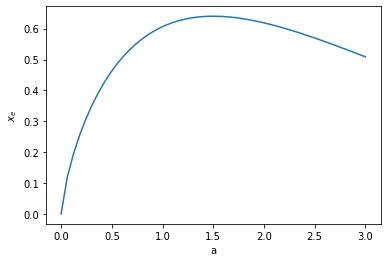

In [3]:
x=np.linspace(0,3)

plt.plot(x,f(x))
plt.xlabel('a')
plt.ylabel('$x_e$')  
plt.show()

2) Pegar o catálogo do ALFALFA e fazer um histograma dos redshifts.

In [4]:
import pandas as pd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
alfalfa = pd.read_csv("/content/drive/MyDrive/a100.code12.table2.190808_modificado_code1_completo.csv",
                       sep=' ',
                       comment='#',
                       names=['agcnr','name','radeg_hi','decdeg_hi','radeg_oc','decdeg_oc','vhelio','w50','sigw','w20','hiflux','sigflux','snr','rms','dist','sigdist','logmh','siglogmh','hicode'])

In [27]:
from scipy import constants
print(constants.speed_of_light)

299792458.0


In [29]:
print("Speed of light in vaccum:", scipy.constants.c)

Speed of light in vaccum: 299792458.0


In [18]:
import scipy.constants
from scipy.constants import c

In [25]:
import numpy as np
from scipy.constants import c

In [34]:
(alfalfa["vhelio"])/scipy.constants.speed_of_light

TypeError: ignored